# Introduction to `explainy` - black-box model explanations for humans
In this notebook, we will go over the main algorithms of the `explainy` package.

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

`explainy` allows you to create machine learning model explanations based on four different explanation characteristics:

-   **global**: explanation of system functionality
-   **local**: explanation of decision rationale
-   **contrastive**: tracing of decision path
-   **non-contrastive**: parameter weighting

The explanations algorithms in `explainy` can be categorized as follows:

| | non-contrastive				|contrastive | 
| --- 			| --- 				| --- | 
|global|Permutation Feature Importance	| Surrogate Model | 
|local|Shap Values	| Counterfactual Example|


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0
)
X_test = pd.DataFrame(X_test, columns=diabetes.feature_names)
y_test = pd.DataFrame(y_test)

model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the Permutation Feature Importance method.
The four features which were most important for the predictions were: 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), and 'age' (0.02).


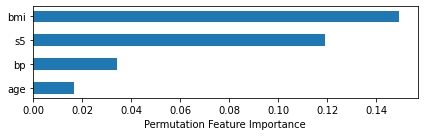

In [3]:
from explainy.explanations import PermutationExplanation

number_of_features = 4
sample_index = 1

explainer = PermutationExplanation(
    X_test, y_test, model, number_of_features
)
explanation = explainer.explain(sample_index)
print(explanation)
explainer.plot(kind='bar')

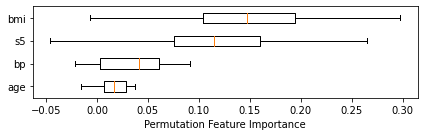

In [4]:
explainer.plot(kind='box')

Generate explanations with multiple numbers of features to explain the outcoume.
Since the `PermuationExplanation` method is a global explaination method, all samples will have the same feature importance explanation.

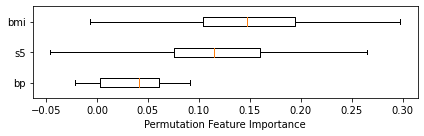

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The three features which were most important for the predictions were: 'bmi' (0.15), 's5' (0.12), and 'bp' (0.03).





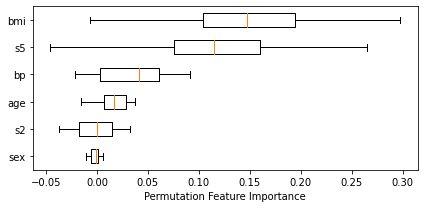

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The six features which were most important for the predictions were: 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), and 'sex' (-0.00).





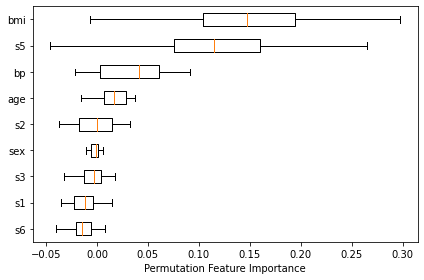

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the Permutation Feature Importance method.
The nine features which were most important for the predictions were: 'bmi' (0.15), 's5' (0.12), 'bp' (0.03), 'age' (0.02), 's2' (-0.00), 'sex' (-0.00), 's3' (-0.00), 's1' (-0.01), and 's6' (-0.01).





In [5]:
# Global, Non-contrastive
sample_index = 0
for number_of_features in [3, 6, 9]:
    explainer = PermutationExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(kind='box')
    print(explanation)
    print('\n\n')

Let's use the `ShapExplanation` to create local explantions for each sample individually.

0


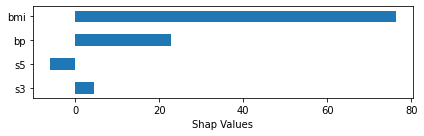

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using the SHAP method.
The four features which contributed most to the prediction of this particular sample were: 'bmi' (76.27), 'bp' (22.80), 's5' (-5.95), and 's3' (4.48).



1


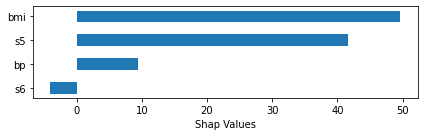

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 251.8.
The feature importance was calculated using the SHAP method.
The four features which contributed most to the prediction of this particular sample were: 'bmi' (49.63), 's5' (41.66), 'bp' (9.40), and 's6' (-4.04).



2


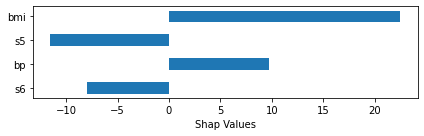

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance was calculated using the SHAP method.
The four features which contributed most to the prediction of this particular sample were: 'bmi' (22.48), 's5' (-11.53), 'bp' (9.70), and 's6' (-7.94).





In [6]:
from explainy.explanations import ShapExplanation

# Local, Non-contrastive
number_of_features = 4
for sample_index in [0, 1, 2]:

    explainer = ShapExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n\n')

Let's use the `SurrogateModelExplanation` to create global explantions.

2021-10-08 22:44:10,785: INFO: Surrogate Model score: 0.53


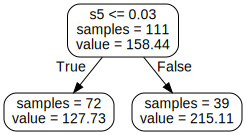

2021-10-08 22:44:11,036: INFO: Surrogate Model score: 0.78


The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using a DecisionTreeRegressor surrogate model. Two tree nodes are shown.
The following thresholds were important for the predictions: 
The samples got a value of 127.73 if 's5' was less or equal than 0.0. 
The samples got a value of 215.11 if 's5' was greater than 0.0.




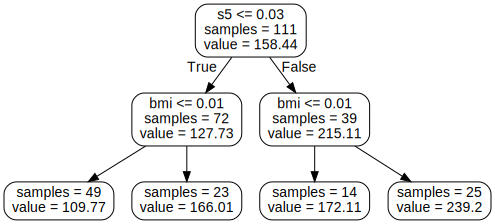

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 250.6.
The feature importance was calculated using a DecisionTreeRegressor surrogate model. Four tree nodes are shown.
The following thresholds were important for the predictions: 
The samples got a value of 109.77 if 's5' was less or equal than 0.0, and 'bmi' was less or equal than 0.0. 
The samples got a value of 166.01 if 's5' was less or equal than 0.0, and 'bmi' was greater than 0.0. 
The samples got a value of 172.11 if 's5' was greater than 0.0, and 'bmi' was less or equal than 0.0. 
The samples got a value of 239.20 if 's5' was greater than 0.0, and 'bmi' was greater than 0.0.




In [7]:
from explainy.explanations import SurrogateModelExplanation

# Global, Contrastive
list_number_of_features = [2, 4]
sample_index = 0
for number_of_features in list_number_of_features:

    explainer = SurrogateModelExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n')


Let's use the `CounterfactualExplanation` to create local explantions and show, how the feature would have had to change to achieve a desired y value.

Maximum number of function evaluations has been exceeded.


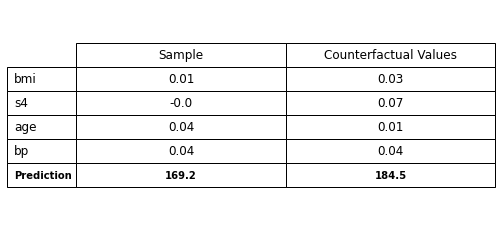

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance is shown using a counterfactual example.
The sample would have had the desired prediction, if the 'bmi' was '0.03', the 's4' was '0.07', the 'age' was '0.01', and the 'bp' was '0.04'.




Maximum number of function evaluations has been exceeded.


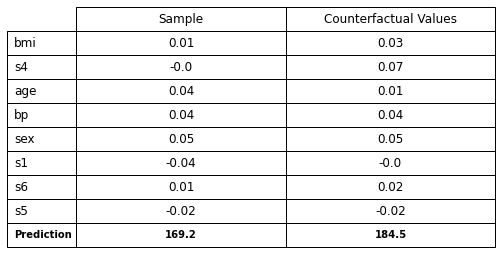

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance is shown using a counterfactual example.
The sample would have had the desired prediction, if the 'bmi' was '0.03', the 's4' was '0.07', the 'age' was '0.01', the 'bp' was '0.04', the 'sex' was '0.05', the 's1' was '-0.0', the 's6' was '0.02', and the 's5' was '-0.02'.




In [8]:
from explainy.explanations import CounterfactualExplanation

# Local, Contrastive
number_of_features = 6
sample_index = 2
for number_of_features in [4, 8]:
    explainer = CounterfactualExplanation(
        X_test, y_test, model, number_of_features, y_desired=180.
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n')
